In [87]:
import PIL
print(PIL.__version__)


11.1.0


In [88]:
from PIL import Image

In [89]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [90]:
train_dir = r'C:\Users\shrey\OneDrive\Desktop\AI Chatbot\New folder\Oral_Cancer\Dataset\Train'
val_dir = r'C:\Users\shrey\OneDrive\Desktop\AI Chatbot\New folder\Oral_Cancer\Dataset\Validation'
test_dir = r'C:\Users\shrey\OneDrive\Desktop\AI Chatbot\New folder\Oral_Cancer\Dataset\Test'

In [91]:

image_width = 128
image_height = 128
batch_size = 64

In [92]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [93]:
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [94]:
# Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 93 images belonging to 2 classes.


In [95]:
validation_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)


Found 24 images belonging to 2 classes.


In [ ]:
test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 24 images belonging to 2 classes.


In [97]:
# Define the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(image_width, image_height, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])


c:\Users\shrey\anaconda3\envs\tf-env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [98]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [106]:
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)




In [100]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7)


In [101]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze initial layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


In [102]:
callbacks=[early_stopping, reduce_lr]


In [103]:
#from sklearn.utils.class_weight import compute_class_weight
#import numpy as np

# Compute class weights
#classes = train_generator.classes
#class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(classes), y=classes)
#class_weights = dict(enumerate(class_weights))*


In [104]:
steps_per_epoch = max(1, len(train_generator))
validation_steps = max(1, len(validation_generator))


In [107]:

# Train the model (Reduced epochs to 100)
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=[early_stopping, reduce_lr],
    #class_weight=class_weights  # ✅ <-- This line uses the computed weights
)

c:\Users\shrey\anaconda3\envs\tf-env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
c:\Users\shrey\anaconda3\envs\tf-env\lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.3170 - loss: 1.2639 - val_accuracy: 0.3750 - val_loss: 0.8129 - learning_rate: 1.0000e-04
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.3702 - loss: 1.1455 - val_accuracy: 0.4583 - val_loss: 0.7320 - learning_rate: 1.0000e-04
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step - accuracy: 0.4533 - loss: 1.0747 - val_accuracy: 0.5833 - val_loss: 0.6739 - learning_rate: 1.0000e-04
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step - accuracy: 0.5682 - loss: 0.9462 - val_accuracy: 0.6667 - val_loss: 0.6366 - learning_rate: 1.0000e-04
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step - accuracy: 0.5954 - loss: 0.7815 - val_accuracy: 0.7083 - val_loss: 0.6147 - learning_rate: 1.0000e-04
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - accuracy: 0.6571 - loss: 0.6782 - val_accuracy: 0.7500 - val_loss: 0.6026 - learning_rate: 1.0000e-04
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step - accuracy: 0.5870 - l

In [108]:
# Save the model
model.save('image_classification_model.h5')

In [109]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=max(1, len(test_generator)))
print(f"Test accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.8750 - loss: 0.3411
Test accuracy: 0.8750


In [110]:
# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [111]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict labels on test set
y_pred = model.predict(test_generator)
y_pred_classes = (y_pred > 0.5).astype("int32")

# True labels
y_true = test_generator.classes

print(classification_report(y_true, y_pred_classes))
print(confusion_matrix(y_true, y_pred_classes))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
              precision    recall  f1-score   support

           0       0.53      0.67      0.59        12
           1       0.56      0.42      0.48        12

    accuracy                           0.54        24
   macro avg       0.54      0.54      0.53        24
weighted avg       0.54      0.54      0.53        24

[[8 4]
 [7 5]]


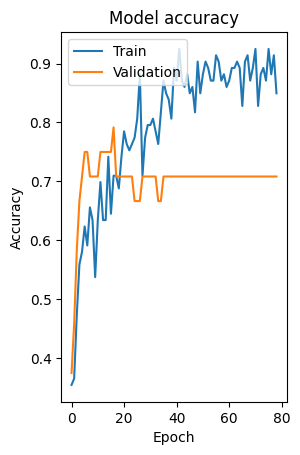

In [112]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

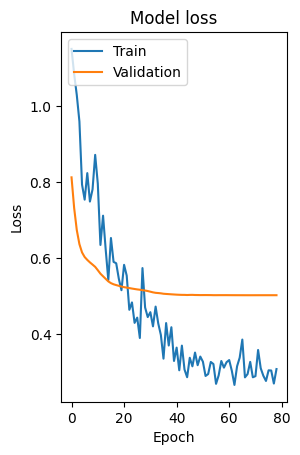

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()